# Predicting Future Crime Rates with Facebook Prophet 

## Violent crimes 

In [1]:
# importing necessary libraries and configurations
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

plt.style.use("seaborn")
%matplotlib inline

In [2]:
# loading datasets
df = pd.read_csv("df_viol.csv")

In [3]:
# data cleaning and indexing
drop = ["latitude", "longitude"]

df.drop(drop, axis=1, inplace=True)
df.occurred_date = df.occurred_date.astype("datetime64")
df.set_index(["occurred_date"], inplace=True)
df.sort_index(inplace=True)

# examining the overall dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29331 entries, 2003-01-01 to 2021-01-02
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   highest_offense_description  29331 non-null  object 
 1   family_violence              29331 non-null  object 
 2   report_date_time             29331 non-null  object 
 3   location_type                29260 non-null  object 
 4   address                      29331 non-null  object 
 5   zip_code                     29129 non-null  float64
 6   council_district             28799 non-null  float64
 7   apd_sector                   29199 non-null  object 
 8   apd_district                 29194 non-null  object 
 9   clearance_status             23746 non-null  object 
 10  clearance_date               27852 non-null  object 
 11  year                         29331 non-null  int64  
 12  month                        29331 non-null  int64  
 13 

None

highest_offense_description family_violence  \
occurred_date                                               
2003-01-01                    AGG ASSAULT               N   
2003-01-01                           RAPE               N   
2003-01-01                    AGG ASSAULT               N   
2003-01-01      AGG ROBBERY/DEADLY WEAPON               N   
2003-01-01      AGG ROBBERY/DEADLY WEAPON               N   

                  report_date_time                 location_type  \
occurred_date                                                      
2003-01-01     2003-01-01 01:50:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01     2003-01-01 11:05:00              RESIDENCE / HOME   
2003-01-01     2003-01-01 23:04:00         PARKING LOTS / GARAGE   
2003-01-01     2003-01-01 04:33:00              RESIDENCE / HOME   
2003-01-01     2003-01-01 02:58:00  STREETS / HWY / ROAD / ALLEY   

                                     address  zip_code  council_district  \
occurred_date                                                              
2003-01-01                      100 W 5TH ST   78701.0               9.0   
2003-01-01     4700 BLOCK MONTEREY OAKS BLVD   78749.0               8.0   
2003-01-01        900 BLOCK N I 35 SB SVC RD   78701.0               9.0   
2003-01-01                2323 TOWN LAKE CIR   78741.0               3.0   
2003-01-01     200 BLOCK E WILLIAM CANNON DR   78745.0               2.0   

              apd_sector apd_district clearance_status       clearance_date  \
occurred_date                                                                 
2003-01-01            GE            1                O  2003-01-02 00:00:00   
2003-01-01            DA            6                C  2003-04-04 00:00:00   
2003-01-01            CH            4                N                  NaN   
2003-01-01            HE            2                N                  NaN   
2003-01-01            FR            4                N                  NaN   

               year  month  week  day  
occurred_date                          
2003-01-01     2003      1     1    1  
2003-01-01     2003      1     1    1  
2003-01-01     2003      1     1    1  
2003-01-01     2003      1     1    1  
2003-01-01     2003      1     1    1

highest_offense_description family_violence  \
occurred_date                                               
2021-01-01                    AGG ASSAULT               N   
2021-01-01                    AGG ASSAULT               N   
2021-01-01                    AGG ASSAULT               N   
2021-01-01                    AGG ASSAULT               N   
2021-01-02      AGG ROBBERY/DEADLY WEAPON               N   

                  report_date_time                    location_type  \
occurred_date                                                         
2021-01-01     2021-01-01 01:12:00                 RESIDENCE / HOME   
2021-01-01     2021-01-01 03:06:00            PARKING LOTS / GARAGE   
2021-01-01     2021-01-01 02:22:00                 RESIDENCE / HOME   
2021-01-01     2021-01-01 03:52:00                 BAR / NIGHT CLUB   
2021-01-02     2021-01-02 19:02:00  SPECIALTY  STORE (TV  FUR ETC.)   

                          address  zip_code  council_district apd_sector  \
occurred_date                                                              
2021-01-01        11301 NICOLE CV   78753.0               1.0         ED   
2021-01-01         8524 BURNET RD   78757.0               7.0         BA   
2021-01-01     9613 SUGAR HILL DR   78748.0               5.0         FR   
2021-01-01           407 E 6TH ST   78701.0               9.0         GE   
2021-01-02       2121 E OLTORF ST   78741.0               3.0         HE   

              apd_district clearance_status       clearance_date  year  month  \
occurred_date                                                                   
2021-01-01               7                N  2021-01-02 00:00:00  2021      1   
2021-01-01               6                C  2021-01-01 00:00:00  2021      1   
2021-01-01               1              NaN                  NaN  2021      1   
2021-01-01               2              NaN                  NaN  2021      1   
2021-01-02               2              NaN                  NaN  2021      1   

               week  day  
occurred_date             
2021-01-01       53    1  
2021-01-01       53    1  
2021-01-01       53    1  
2021-01-01       53    1  
2021-01-02       53    2

## Predicting crime rates with Facebook Prophet 

### Modeling the data as-is

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


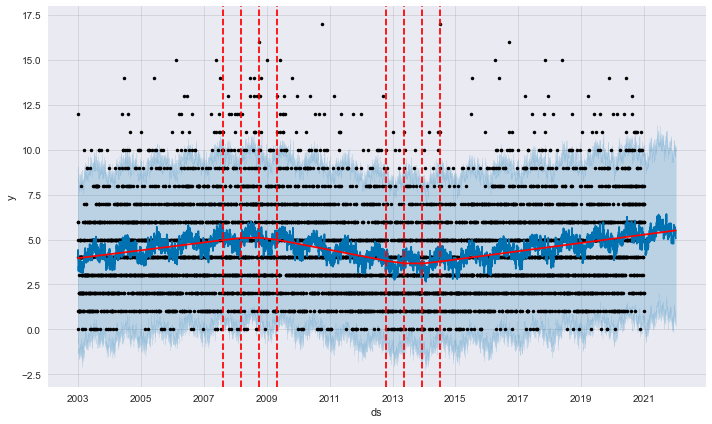

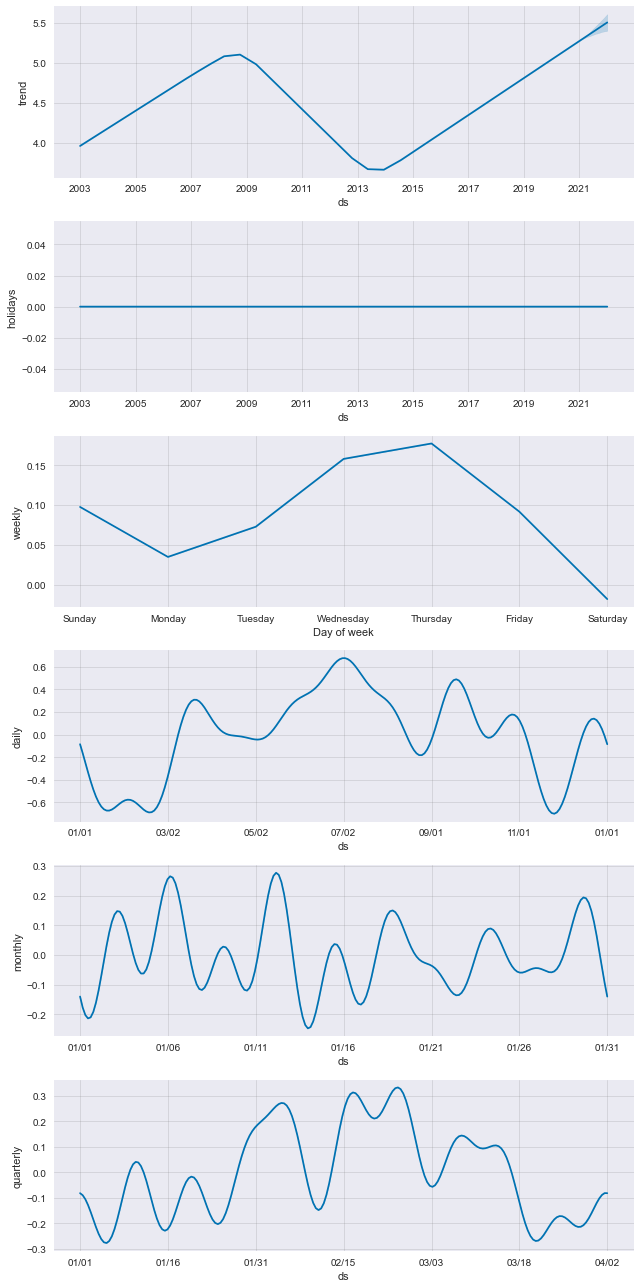

In [4]:
# forecasting for overall crime
df_fbprophet = df.copy()
df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})
df_m_final["y"] = pd.to_numeric(df_m_final["y"])
# df_m_final["y"] = np.log(df_m_final["y"])
y = df_m_final["y"].to_frame()
y.index = df_m_final["ds"]
n = np.int(y.count())

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.add_country_holidays(country_name="US")
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

fig2 = m.plot_components(forecast)

fig2_1 = plot_plotly(m, forecast)
fig2_1

In [11]:
# The forecast is 'log transformed', so we need to 'inverse' it back by using the exp
forecast_df_exp = np.exp(forecast[["yhat", "yhat_lower", "yhat_upper"]])
forecast_df_exp.index = forecast["ds"]

# Calculating MAPE error 
error = forecast_df_exp["yhat"] - y["y"]
MAPE_m1 = (error / y["y"]).abs().sum() / n * 100
round(MAPE_m1, 2)

inf

### Mitigating outlier effects on moodel accuracy 

In [6]:
# Make another copy of the data frame as m2
df_prophet2 = df_m_final.copy()

# Define the Upper Control Limit and Lower Control Limit as 3 standard deviations from the mean
ucl = df_prophet2.mean() + df_prophet2.std() * 3
lcl = df_prophet2.mean() - df_prophet2.std() * 3

# display the number of outliers found
print(
    "Above 3 standard deviations: ",
    df_prophet2[df_prophet2["y"] > ucl["y"]]["y"].count(),
    "entries",
)
print(
    "Below 3 standard deviations: ",
    df_prophet2[df_prophet2["y"] < lcl["y"]]["y"].count(),
    "entries",
)

Above 3 standard deviations:  75 entries
Below 3 standard deviations:  0 entries


c:\users\robert\anaconda3\envs\fbprophet\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

c:\users\robert\anaconda3\envs\fbprophet\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


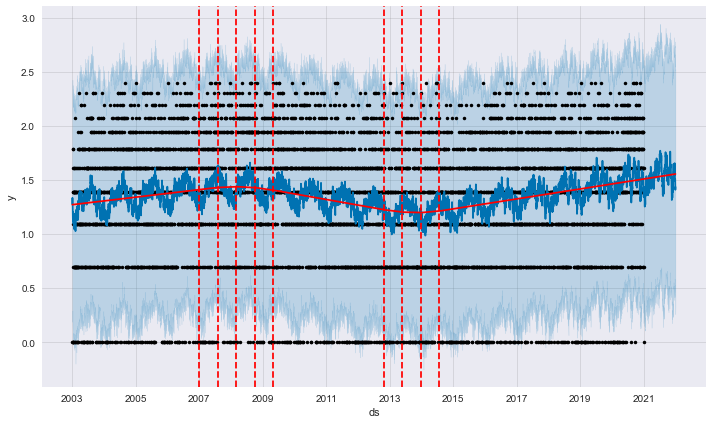

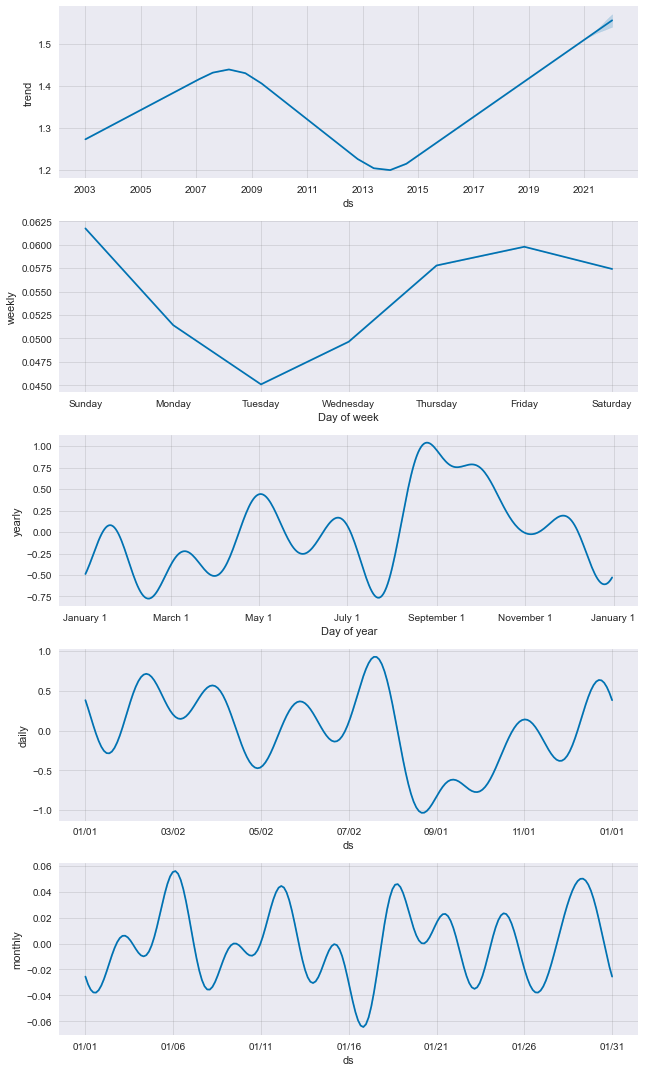

In [8]:
# Remove them by setting their value to None. Prophet says it can handle null values.
df_prophet2.loc[df_prophet2["y"] > ucl["y"], "y"] = None
df_prophet2.loc[df_prophet2["y"] < lcl["y"], "y"] = None

# Log transformation
df_prophet2["y"] = pd.to_numeric(df_prophet2["y"])

# Run Prophet using model 2
m2 = Prophet(interval_width=0.95)
m2.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m2.add_seasonality(name="weekly", period=52, fourier_order=10)
m2.add_seasonality(name="daily", period=365, fourier_order=10)
m2.fit(df_prophet2)

future = m2.make_future_dataframe(periods=365)

forecast_m2 = m2.predict(future)

fig_m2 = m2.plot(forecast_m2)
a = add_changepoints_to_plot(fig_m2.gca(), m2, forecast_m2)

fig2m2 = m2.plot_components(forecast_m2)

fig2_1m2 = plot_plotly(m2, forecast_m2)
fig2_1m2

In [9]:
# The forecast is 'log transformed', so we need to 'inverse' it back by using the exp
forecast_m2_exp = np.exp(forecast_m2[["yhat", "yhat_lower", "yhat_upper"]])
forecast_m2_exp.index = forecast_m2["ds"]

# Calculate the error
error = forecast_m2_exp["yhat"] - y["y"]
MAPE_m2 = (error / y["y"]).abs().sum() / n * 100
round(MAPE_m2, 2)

inf